# Introduction

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("crime.csv")

In [3]:
df.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532


In [4]:
df.shape

(2237605, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237605 entries, 0 to 2237604
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Dc_Dist             int64  
 1   Psa                 object 
 2   Dispatch_Date_Time  object 
 3   Dispatch_Date       object 
 4   Dispatch_Time       object 
 5   Hour                int64  
 6   Dc_Key              int64  
 7   Location_Block      object 
 8   UCR_General         float64
 9   Text_General_Code   object 
 10  Police_Districts    float64
 11  Month               object 
 12  Lon                 float64
 13  Lat                 float64
dtypes: float64(4), int64(3), object(7)
memory usage: 239.0+ MB


In [6]:
df.isnull().sum()

Dc_Dist                   0
Psa                       0
Dispatch_Date_Time        0
Dispatch_Date             0
Dispatch_Time             0
Hour                      0
Dc_Key                    0
Location_Block            0
UCR_General             663
Text_General_Code       663
Police_Districts      19930
Month                     0
Lon                   17349
Lat                   17349
dtype: int64

In [7]:
df['value']=1
df.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,value
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN,1
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN,1
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN,1
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389,1
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532,1


Taken from https://metadata.phila.gov/#home/datasetdetails/5543868920583086178c4f8e/representationdetails/570e7621c03327dc14f4b68d/?view_287_per_page=25&view_287_page=1
here are the definitions of some variables that may be unclear:

- <b>Dc_Dist</b>: A two character field that names the District boundary.
- <b>Psa</b>: A single character field that names the Police Service Area boundary.
- <b>Dispatch_Date_Time</b>: The date and time that the officer was dispatched to the scene.
- <b>Dispatch_Date</b>: Dispatch date formatted as a string
- <b>Dispatch_Time</b>: Dispatch time formatted as a string
- <b>Hour</b>: The generalized hour of the dispatched time.
- <b>Dc_Key</b>: The unique identifier of the crime that consists of Year + District + Unique ID.
- <b>Location_Block</b>: The location of crime generalized by street block.
- <b>UCR_General</b>: The rounded crime code
- <b>Text_General_Code</b>: The generalized text for the crime code

## Questions:

1. What type of crime is most common in Philadelphia?
2. What time of day are certain crimes more likely to occur?
3. Over the course of the ten year time frame, how has crime changed?
    - Which crimes have become less common?
    - Which crimes have become more common?
4. Which day has the most amount of crime? The least amount of crime?
5. In which neighborhoods do the top crimes take place?
6. Which police districts have seen the greatest decrease in crime?
7. Which police districts have seen the greatest increase in crime?

### 1. What type of crime is most common in Philadelphia?

In [37]:
crime_types = df.groupby('Text_General_Code')['value'].count().sort_values(ascending=False)
crime_types.head()

Text_General_Code
All Other Offenses             437581
Other Assaults                 277332
Thefts                         257923
Vandalism/Criminal Mischief    200345
Theft from Vehicle             171135
Name: value, dtype: int64

<AxesSubplot:xlabel='value', ylabel='Text_General_Code'>

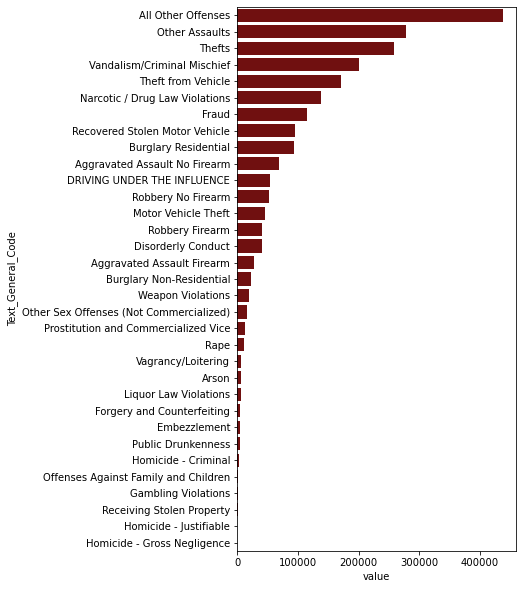

In [46]:
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(x=crime_types, y=crime_types.index, orient='h', ax = ax, color = 'maroon')

### 2. What time of day are certain crimes more likely to occur?

Let's first get a count of total crimes by hour.

line plot of time of day, multiple lines for different types of crime

In [74]:
hour_count = df.groupby('Hour')['value'].count()
hour_count

Hour
0     119803
1      94850
2      67119
3      46437
4      30136
5      22767
6      22239
7      38170
8      75900
9      96717
10    106904
11    114437
12    114863
13    113768
14     98368
15    103392
16    134916
17    126942
18    119814
19    122582
20    118141
21    113595
22    120439
23    115306
Name: value, dtype: int64

<AxesSubplot:xlabel='Hour', ylabel='value'>

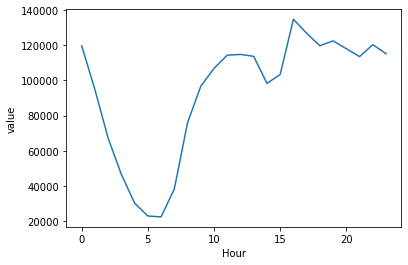

In [50]:
sns.lineplot(x = hour_count.index, y = hour_count)

The least amount of crime happens during the early morning hours, from 4-7 AM. 

The highest amount of crime takes place from 9 AM - 1 AM, with a peak at 4 PM.

Here, we will take a look at the top five crimes broken down by hour.

In [75]:
top_crime_cats = ['All Other Offenses', 'Other Assaults', 'Thefts', 'Vandalism/Criminal Mischief', 'Theft from Vehicle']

<AxesSubplot:xlabel='Hour'>

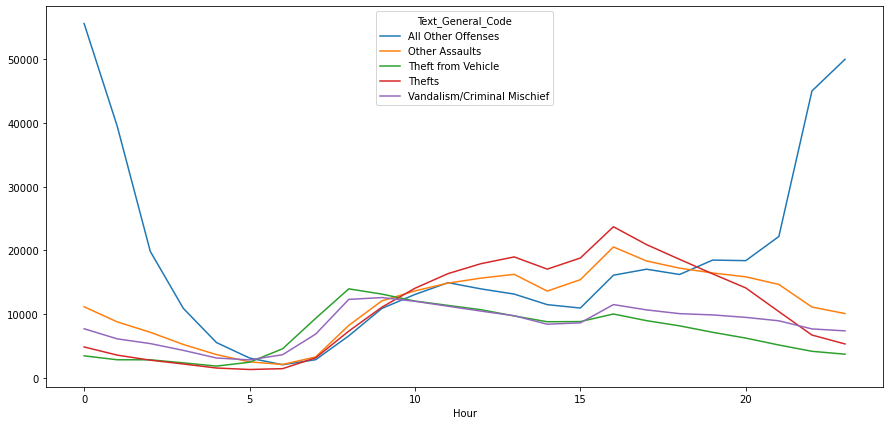

In [77]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df[df['Text_General_Code'].isin(top_crime_cats)].groupby(['Hour','Text_General_Code']).count()['value'].unstack().plot(ax=ax)

Interestingly enough, while other crimes seem to decrease from 8 PM to 12 AM, crimes categorized by "All Other Offenses" is the only type of crime (out of the top five) that increases in frequency during that time period.

## 3. Over the course of the ten year time frame, how has crime changed?
a) Which crimes have become less common?

b) Which crimes have become more common?

In [78]:
date_count = df.groupby('Dispatch_Date')['value'].count()
date_count

Dispatch_Date
2006-01-01    606
2006-01-02    589
2006-01-03    629
2006-01-04    699
2006-01-05    594
             ... 
2017-03-19    344
2017-03-20    442
2017-03-21    445
2017-03-22    398
2017-03-23      6
Name: value, Length: 4100, dtype: int64

<AxesSubplot:xlabel='Dispatch_Date', ylabel='value'>

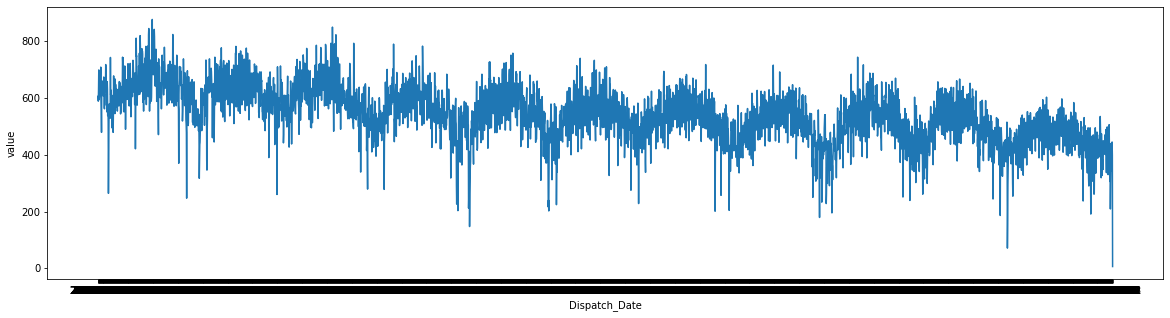

In [80]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(x = date_count.index, y = date_count, ax = ax)

In [81]:
month_count = df.groupby('Month')['value'].count()
month_count

Month
2006-01    19359
2006-02    15894
2006-03    18627
2006-04    18940
2006-05    20041
           ...  
2016-11    13497
2016-12    12783
2017-01    12969
2017-02    11764
2017-03     8709
Name: value, Length: 135, dtype: int64

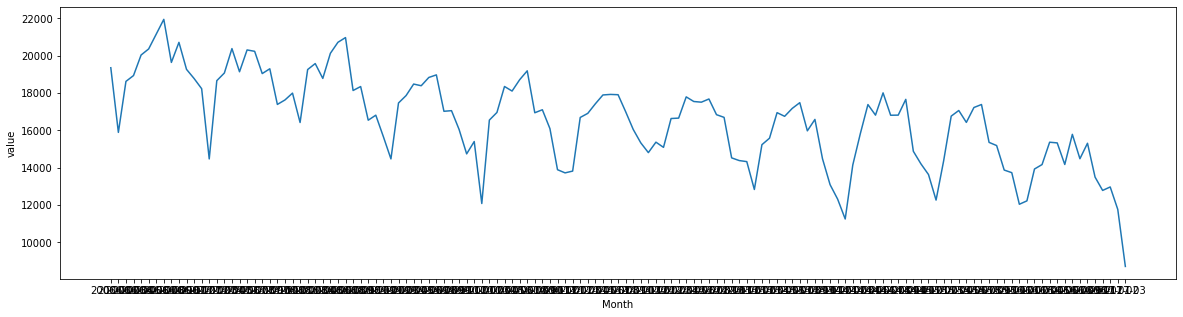

In [82]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(x = month_count.index, y = month_count, ax = ax)
plt.show()

## Key Findings

Most crime occurs from 9 AM - 1 AM.